<a href="https://colab.research.google.com/github/namyaagrawal03/Sign-language-recognition/blob/main/sign_language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
df=pd.read_csv("/content/drive/MyDrive/sign_train.csv")

Mounted at /content/drive


In [ ]:
df.shape

(27455, 785)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [ ]:
print(df.head())
# 28*28 pixel images
#total 27455 images

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

In [ ]:
df['label'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 27455 entries, 0 to 27454
Series name: label
Non-Null Count  Dtype
--------------  -----
27455 non-null  int64
dtypes: int64(1)
memory usage: 214.6 KB


In [ ]:
n=df['label'].nunique()
print(n)

24


In [ ]:
# american sign language do not have letters 'J' and 'Z

In [ ]:
alphabets_labels = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E',
    5: 'F', 6: 'G', 7: 'H', 8: 'I',
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O',
    15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
    20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y'
}
#According to dataset

In [ ]:
df['label']=df['label'].map(alphabets_labels)

In [ ]:
arr=df.values             #converts sequential data to n dimensional array
y= arr[:, 0]
x= arr[:, 1:]

In [ ]:
y
y.reshape(-1,1)
print(y.shape)

(27455,)


In [ ]:
x.shape
x=x.astype(int)

In [ ]:
x

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]])

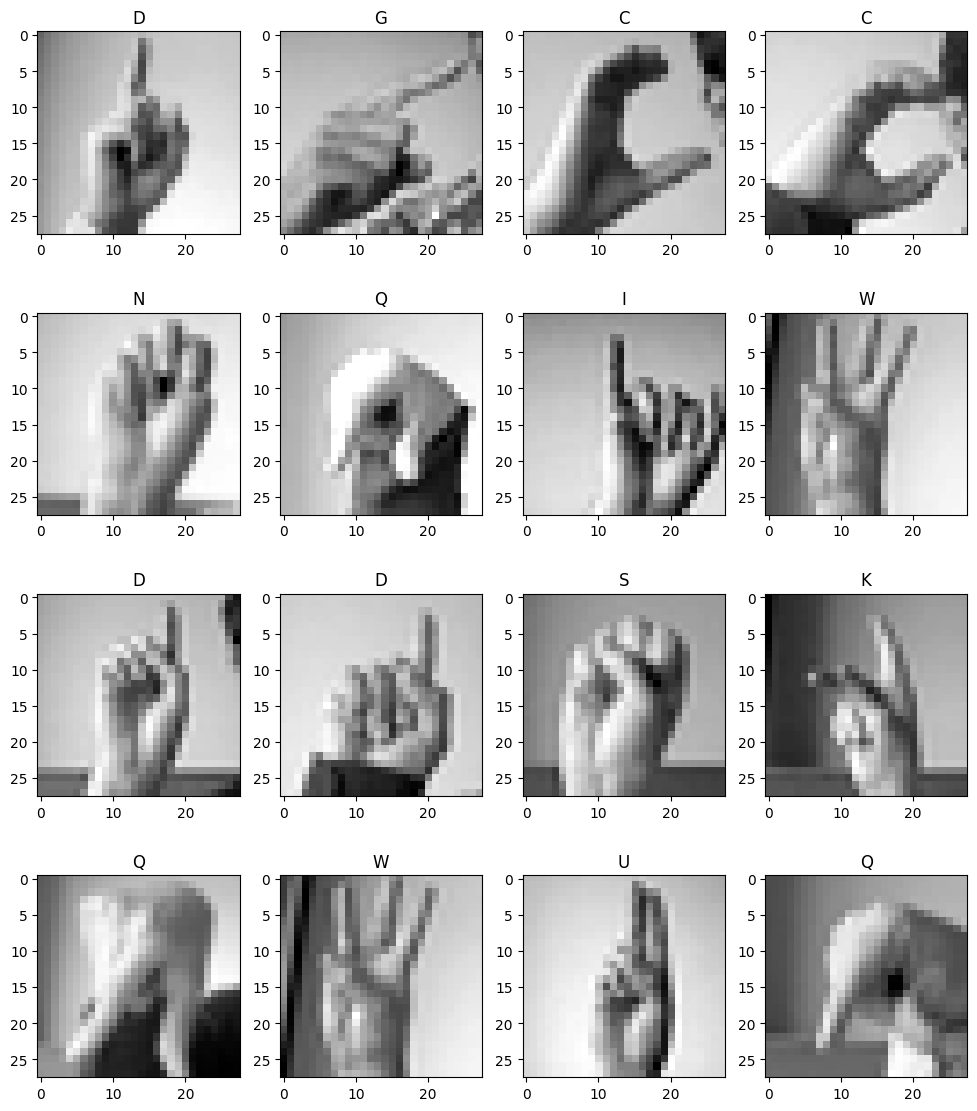

In [ ]:
#Plotting some samples
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):                                   #i is index of current subplot, ax is subplot
    ax.imshow(x[i].reshape(28,28), cmap='gray')
    ax.set(title= df.iloc[i,0])

In [ ]:
#preprocessing
#label encoding
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

In [ ]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
y.shape
# through label encoding, we have converted categorical to numerical data according to categories present , which are 24

(27455, 24)

In [ ]:
# Scaling the data to bring the range between 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(x)
x = scaler.transform(x)

In [ ]:
x

array([[0.41960784, 0.4627451 , 0.49803922, ..., 0.8       , 0.79607843,
        0.79215686],
       [0.60784314, 0.61568627, 0.61176471, ..., 0.40392157, 0.52941176,
        0.58431373],
       [0.73333333, 0.7372549 , 0.7372549 , ..., 0.76470588, 0.76078431,
        0.76470588],
       ...,
       [0.68235294, 0.68235294, 0.68235294, ..., 0.79215686, 0.78431373,
        0.78431373],
       [0.69411765, 0.70980392, 0.72156863, ..., 0.25098039, 0.34117647,
        0.36470588],
       [0.70196078, 0.70588235, 0.70588235, ..., 0.80392157, 0.81960784,
        0.84313725]])

In [ ]:
x.shape
#each image is in form of flattened array of lenght 784
#To use data for CNN, the data needs to be reshaped in  a 4D array

(27455, 784)

In [ ]:
# Reshape
x = x.reshape(-1,28,28,1)
x.shape

(27455, 28, 28, 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=3)

In [ ]:
x_train.shape

(24709, 28, 28, 1)

In [ ]:
y_train.shape

(24709, 24)

In [ ]:
x_test.shape

(2746, 28, 28, 1)

In [ ]:
y_test.shape


(2746, 24)

In [ ]:
datagen = ImageDataGenerator(

        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180) here 10 deg
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True  # randomly flip images
)
datagen.fit(x_train)

NameError: ignored

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

model = Sequential([
    Conv2D(12, (3, 3), strides=1, padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D((2, 2), strides=2, padding='same'),
    Dropout(0.2),
    # 12: Specifies the number of filters
    # (3,3): Specifies the size of the convolutional kernel
    #strides: "strides" refer to the step size at which the convolutional or pooling operation is applied to the input data
    #padding='same': Pads the input to maintain the same spatial dimensions in the output.
    #activation='relu': Uses the ReLU activation function

    Conv2D(24, (3, 3), strides=1, padding='same', activation='relu'),
    MaxPool2D((2, 2), strides=2, padding='same'),
    Dropout(0.2),

    Flatten(),
    Dense(units=512, activation='relu'),
    Dropout(0.2),

    Dense(units=24, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
